[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/regression.ipynb)

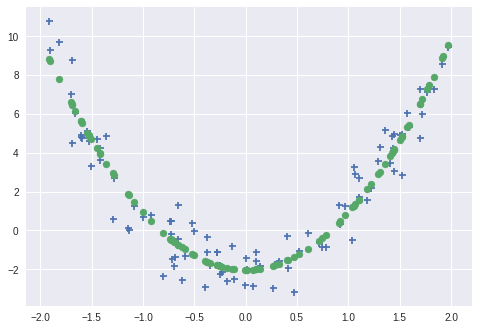

In [13]:
from matplotlib import pyplot as plt
import numpy as np
x=np.random.rand(100,1)
x=x*4-2
y=3*x**2-2
y+=np.random.randn(100,1)
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x**2,y)
plt.scatter(x,y,marker='+')
plt.scatter(x,model.predict(x**2),marker='o')
plt.show()

In [14]:
print(model.coef_)
print(model.intercept_)

[[2.97178582]]
[-2.03466586]


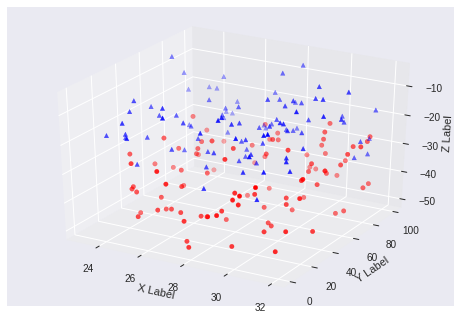

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [19]:
!pip install plotly

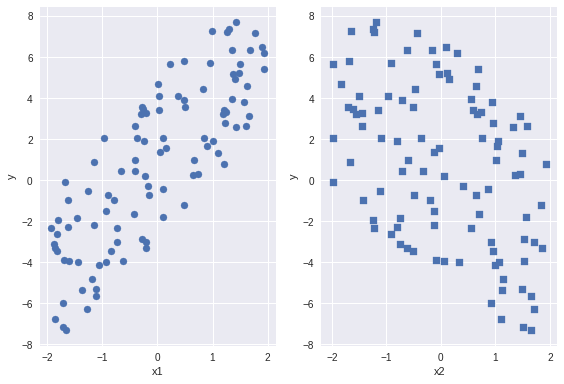

In [21]:
from matplotlib import pyplot as plt
import numpy as np
x1=np.random.rand(100,1)
x1=x1*4-2
x2=np.random.rand(100,1)
x2=x2*4-2
y=3*x1-2*x2+1
plt.subplot(1,2,1)
plt.scatter(x1,y,marker='o')
plt.xlabel('x1')
plt.ylabel('y')
plt.subplot(1,2,2)
plt.scatter(x2,y,marker='s')
plt.xlabel('x2')
plt.ylabel('y')
plt.tight_layout()
plt.show()

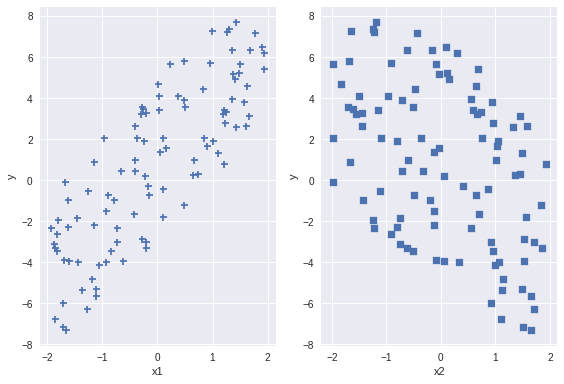

In [25]:
from sklearn import linear_model
x1_x2=np.c_[x1,x2]
model=linear_model.LinearRegression()
model.fit(x1_x2,y)
y_=model.predict(x1_x2)
plt.subplot(1,2,1)

plt.scatter(x1,y_,marker='+')
plt.xlabel('x1')
plt.ylabel('y')
plt.subplot(1,2,2)

plt.scatter(x2,y_,marker='s')
plt.xlabel('x2')
plt.ylabel('y')
plt.tight_layout()
plt.show()
